# Introduction


les Iris de Fisher correspondent à 150 fleurs décrites par 4 variables quantitatives : longueur
du sépale, largeur du sépale, longueur du pétal et largeur du pétal. Les 150 fleurs sont réparties
en 3 différentes espèces : iris setosa, iris versicolor et iris virginica. Chaque classe est composée de 50
fleurs. La classe setosa est linéairement séparable des deux autres, alors que versicolor et virginica ne le sont
pas. 

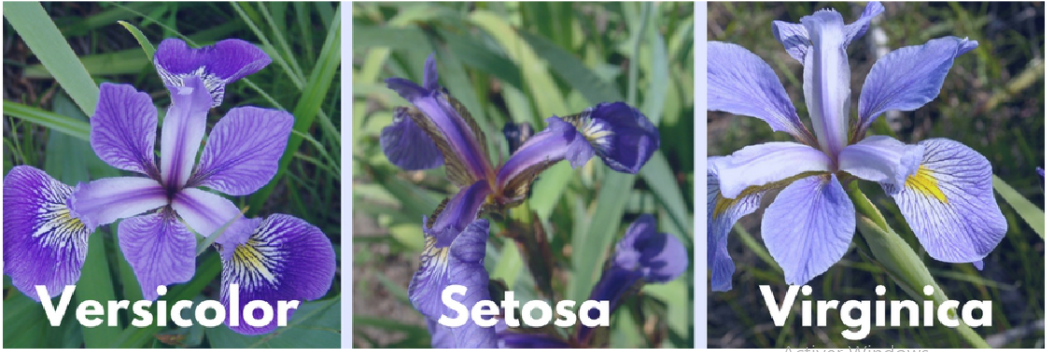

## Chargement des bibliothèques :
Premièrement, nous importons les bibliothèques numpy, pyplot et sklearn.

Scikit-Learn vient avec un ensemble de jeu de données prêt à l’emploi pour des fins d’expérimentation.  Ces dataset sont regroupés dans le package  sklearn.datasets.

On charge le package datasets pour retrouver le jeu de données IRIS.

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sklearn.metrics as sm
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import accuracy_score

import torch
import torch.nn as nn
import torch.nn.functional as F

%matplotlib inline

Pour charger le jeu de données Iris, on utilise la méthode load_iris() du package datasets.

In [2]:
iris = datasets.load_iris()
x = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns=['Target'])

Les attributs du jeu de données sont :
- longueur de sépale

- largeur de sépale

- longueur de pétale

- largeur de pétale

classe : Iris Setosa, Iris Versicolor ou Iris Virginica.

In [ ]:
x.head()

In [ ]:
y.head()

## Visualisation du jeu de données

Afin de mieux comprendre notre jeu de données, il est judicieux de le visualiser.

In [ ]:
plt.figure(figsize=(12,3))
colors = np.array(['red', 'green', 'blue'])
iris_targets_legend = np.array(iris.target_names)
red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')


plt.subplot(1, 2, 1)
plt.scatter(x['Sepal Length'], x['Sepal Width'], c=colors[y['Target']])
plt.title('Sepal Length vs Sepal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1,2,2)
plt.scatter(x['Petal Length'], x['Petal Width'], c= colors[y['Target']])
plt.title('Petal Length vs Petal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])

le jeu de données contient deux clusters avec une séparation plutôt évidente.  L'un des groupes contient l'Iris setosa, tandis que l'autre groupe contient à la fois l'Iris virginica et l'Iris versicolor

Avant qu'on entamme l'entrainement et l'evaluation du model , on separe notre jeu de données en deux parties :
  - 70% pour l'apprentissage
  - 30% pour le test

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=0)

# Arbre de décision 
Les algorithmes de Decision tree, que l’on appelle également arbres de décision font partie de la catégorie des algorithmes supervisés, ils permettent de prédire une valeur (prédiction) ou une catégorie (classement).
Nous pouvons désormais construire un arbre de décision sur ces données :

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

Une fois l’apprentissage terminé, nous pouvons visualiser l’arbre avec matplotlib 

In [ ]:
plt.figure(figsize=(20,20))
tree.plot_tree(clf, filled=True)

Une fois le modèle construit, il est possible de l’utiliser pour la prédiction sur de nouvelles données et calculer le score

In [ ]:
clf.predict(X_test)
clf.score(X_test, y_test)

# k-Nearest Neighbours
(k-NN voire KNN ou méthode des k plus proches voisins) : k-NN est un algorithme standard de classification qui 
repose exclusivement sur le choix de la métrique de classification. Il est “non paramétrique” (seul k doit être fixé) 
et se base uniquement sur les données d’entraînement.

L’idée est la suivante : à partir d’une base de données étiquetées, on peut estimer la classe d’une nouvelle donnée en 
regardant quelle est la classe majoritaire des k données voisines les plus proches (d’où le nom de l’algorithme). 
Le seul paramètre à fixer est k, le nombre de voisins à considérer (voir figure).

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(knn.score(X_test, y_test))

# Logistic regression
Logistic regression (régression logistique) est un algorithme supervisé  de classification, populaire en Machine Learning. Lors de cet article, nous allons détailler son fonctionnement pour la classification binaire et par la suite on verra sa généralisation sur la classification multi-classes.

Scikit Learn offre une classe d’implémentation de la régression Logistique. On instanciera cette classe pour entraîner un modèle prédictif.

L’instruction model.fit(X, Y) permet d’entraîner le modèle.

- La variable X comporte l’ensemble des observations qui serviront à l’entrainement de notre algorithme de Machine Learning
- la variable Y comporte l’étiquette de chacune de ces observations.

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
logreg.predict(X_test)

logreg.score(X_test, y_test)

# Prédire de la classe de nouvelles fleurs d’IRIS

Maintenant qu’on a entraîné notre algorithme de régression logistique, on va l’utiliser pour prédire la classe de fleurs d’IRIS qui ne figuraient pas dans le jeu d’entrainement. Pour rappel, on a utilisé que les variables explicatives “Sepal Length” et “Sepal Width” pour entrainer notre jeu de données. Ainsi, nous allons fournir des valeurs pour ces deux variables et on demandera au modèle prédictif de nous indiquer la classe de la fleur.

In [ ]:
Iries_To_Predict = [
    [5.5, 2.5,3,4],
    [7, 3,4,5]
]

logreg.predict(Iries_To_Predict) 

# Réseaux de neurones

Les réseaux neuronaux s'inspirent du processus d'apprentissage qui se déroule dans le cerveau humain. Ils se composent d'un réseau artificiel de fonctions, appelées paramètres, qui permet à l'ordinateur d'apprendre et de s'ajuster lui-même en analysant de nouvelles données. Chaque paramètre, parfois également appelé neurones, est une fonction qui produit une sortie, après avoir reçu une ou plusieurs entrées. Ces sorties sont ensuite transmises à la couche suivante de neurones, qui les utilisent comme entrées de leur propre fonction et produisent d'autres sorties. Ces sorties sont ensuite transmises à la couche suivante de neurones, et ainsi cela se poursuit jusqu'à ce que chaque couche de neurones ait été prise en compte et que les neurones terminaux aient reçu leur entrée. Ces neurones terminaux produisent ensuite le résultat final du modèle.

In [4]:
#convertir les données en tensor pour qu'on puisse les utiliser avec pytorch
X_train = torch.from_numpy(X_train.to_numpy()).float()
y_train = torch.squeeze(torch.from_numpy(y_train.to_numpy()).float())
X_test = torch.from_numpy(X_test.to_numpy()).float()
y_test = torch.squeeze(torch.from_numpy(y_test.to_numpy()).float())
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([105, 4]) torch.Size([105])
torch.Size([45, 4]) torch.Size([45])


In [5]:
#creer une classe des données
class Data(Dataset):
    def __init__(self):
        self.x=X_train.type(torch.FloatTensor)
        self.y=y_train.type(torch.LongTensor)
        self.len=self.x.shape[0]
    def __getitem__(self,index):      
        return self.x[index], self.y[index]
    def __len__(self):
        return self.len

In [6]:
data_set=Data()

In [7]:
data_set.x[0:10]

tensor([[5.0000, 2.0000, 3.5000, 1.0000],
        [6.5000, 3.0000, 5.5000, 1.8000],
        [6.7000, 3.3000, 5.7000, 2.5000],
        [6.0000, 2.2000, 5.0000, 1.5000],
        [6.7000, 2.5000, 5.8000, 1.8000],
        [5.6000, 2.5000, 3.9000, 1.1000],
        [7.7000, 3.0000, 6.1000, 2.3000],
        [6.3000, 3.3000, 4.7000, 1.6000],
        [5.5000, 2.4000, 3.8000, 1.1000],
        [6.3000, 2.7000, 4.9000, 1.8000]])

In [8]:
data_set.y[0:10]

tensor([1, 2, 2, 2, 2, 1, 2, 1, 1, 2])

In [9]:
data_set.x.shape, data_set.y.shape

(torch.Size([105, 4]), torch.Size([105]))

# Sigmoid activation :

La principale raison pour laquelle nous utilisons la fonction sigmoïde est qu'elle definie entre (0 et 1). Par conséquent, elle est particulièrement utilisée pour les modèles où nous devons prédire la probabilité en tant que sortie. Comme la probabilité de quoi que ce soit n'existe qu'entre 0 et 1, sigmoïde est le bon choix.
La fonction est différentiable, ce qui signifie que nous pouvons trouver la pente de la courbe sigmoïde en deux points quelconques.
La fonction softmax est une fonction d'activation logistique plus généralisée qui est utilisée pour la classification multiclasse.

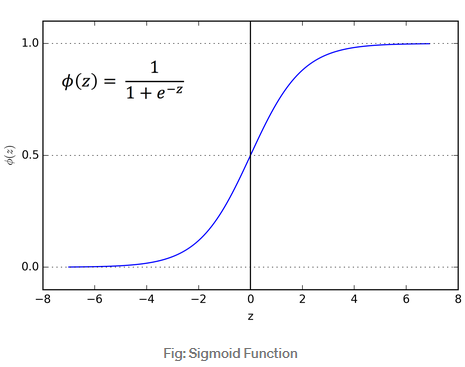

# Architecture du reseau 


Ici, nous utilisons 4 couches de perceptron:

- La première couche a 4 entrées, 100 neurones et une fonction d'activation logistique.
- La deuxième couche a 100 entrées, 50 neurones et une fonction d'activation logistique.
- La troisème couche a 100 entrées, 3 neurones et une fonction d'activation logistique.
- La couche probabiliste permet aux sorties d'être interprétées comme des probabilités, c'est-à-dire que toutes les sorties sont comprises entre 0 et 1, et leur somme est 1. La méthode probabiliste softmax est utilisée ici.

Le réseau neuronal a trois sorties puisque la variable cible contient 3 classes (setosa, versicolor et virginica).

La figure suivante est une représentation graphique de ce réseau de neurones de classification:

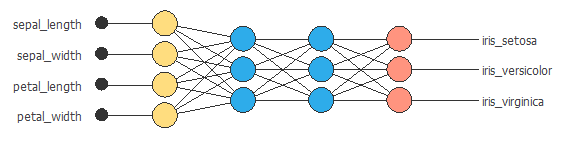

In [23]:
class IrisNet(nn.Module):
    
    def __init__(self, input_size, hidden1_size, hidden2_size, num_classes):
        
        super(IrisNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden1_size, hidden2_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden2_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out

In [24]:
model = IrisNet(4, 100, 50, 3)
print(model)

IrisNet(
  (fc1): Linear(in_features=4, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=50, out_features=3, bias=True)
)


In [25]:
optimizer= torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

In [26]:
n_epochs=1000
for epoch in range(n_epochs):
        #make a prediction for both models 
        yhat = model(data_set.x)
        #calculate the lossf or both models 
        loss = criterion(yhat, data_set.y)
        #store the loss for  both the training and validation  data for both models 
        #clear gradient 
        optimizer.zero_grad()
        #Backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()

        #the step function on an Optimizer makes an update to its parameters
        optimizer.step()
        if epoch % 10 ==0 :
            print ('number of epoch', epoch, 'loss', loss.item())
predict_out = model(X_test)
_, predict_y = torch.max(predict_out, 1)
print ('test accuracy {}'.format(accuracy_score(y_test.data, predict_y.data)))

number of epoch 0 loss 1.5448344945907593
number of epoch 10 loss 0.639694094657898
number of epoch 20 loss 0.1943231076002121
number of epoch 30 loss 0.06581573188304901
number of epoch 40 loss 0.041238538920879364
number of epoch 50 loss 0.036600831896066666
number of epoch 60 loss 0.038074906915426254
number of epoch 70 loss 0.03469465300440788
number of epoch 80 loss 0.02956288494169712
number of epoch 90 loss 0.027698960155248642
number of epoch 100 loss 0.02668927051126957
number of epoch 110 loss 0.025531232357025146
number of epoch 120 loss 0.0247581135481596
number of epoch 130 loss 0.02396995946764946
number of epoch 140 loss 0.023284992203116417
number of epoch 150 loss 0.025545978918671608
number of epoch 160 loss 0.02573428303003311
number of epoch 170 loss 0.02582736313343048
number of epoch 180 loss 0.023884089663624763
number of epoch 190 loss 0.020861882716417313
number of epoch 200 loss 0.020461514592170715
number of epoch 210 loss 0.020921384915709496
number of epoch